# Logistic Regression

## Import Data

In [94]:
## Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
## Print out information file for review if necessary.
base_path = 'C:\\Users\\casey\\Desktop\\PythonDataScience\\LogisticRegression\\Data\\'
filename = "krkopt.info"
path_to_file = os.path.join(base_path, filename)
fd = open(path_to_file , 'r')

for line in fd:
    print(line)

1. Title:

   Chess Endgame Database for White King and Rook against Black King (KRK) -

   Black-to-move Positions Drawn or Lost in N Moves.



2. Source Information:

   -- Creators: Database generated by Michael Bain and Arthur van Hoff

      at the Turing Institute, Glasgow, UK.

   -- Donor: Michael Bain (mike@cse.unsw.edu.au), AI Lab, Computer Science,

      University of New South Wales, Sydney 2052, Australia.

      (tel) +61 2 385 3939

      (fax) +61 2 663 4576

   -- Date: June, 1994.



3. Past Usage:



	Chess endgames are complex domains which are enumerable. Endgame

   databases are tables of stored game-theoretic values for the enumerated

   elements (legal positions) of the domain. The game-theoretic values stored

   denote whether or not positions are won for either side, or include also

   the depth of win (number of moves) assuming minimax-optimal play. From the

   point of view of experiments on computer induction such databases provide

   not only a sour

In [52]:
## Import Dataset with header 
column_names = ['White King file','White King rank','White Rook file','White Rook rank',
          'Black King file','Black King rank','optimal depth-of-win']

chess = pd.read_csv(r'C:\Users\casey\Desktop\PythonDataScience\LogisticRegression\Data\krkopt.csv.data', names = column_names)

In [53]:
## Print out first five lines to verify data has read in correctly.
chess.head()

,White King file,White King rank,White Rook file,White Rook rank,Black King file,Black King rank,optimal depth-of-win
0,a,1,b,3,c,2,draw
1,a,1,c,1,c,2,draw
2,a,1,c,1,d,1,draw
3,a,1,c,1,d,2,draw
4,a,1,c,2,c,1,draw


In [56]:
chess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28056 entries, 0 to 28055
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   White King file       28056 non-null  object
 1   White King rank       28056 non-null  int64 
 2   White Rook file       28056 non-null  object
 3   White Rook rank       28056 non-null  int64 
 4   Black King file       28056 non-null  object
 5   Black King rank       28056 non-null  int64 
 6   optimal depth-of-win  28056 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.5+ MB


In [58]:
chess.describe()

,White King rank,White Rook rank,Black King rank
count,28056.000000,28056.000000,28056.000000
mean,1.854006,4.512404,4.451811
std,0.926414,2.282723,2.248387
min,1.000000,1.000000,1.000000
25%,1.000000,3.000000,3.000000
50%,2.000000,5.000000,4.000000
75%,2.000000,6.000000,6.000000
max,4.000000,8.000000,8.000000


## Data Exploration

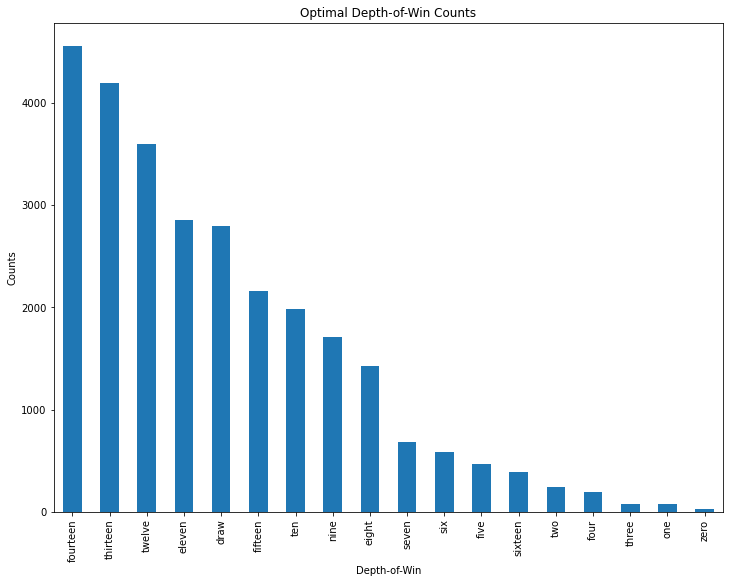

In [118]:
## Let's have a look at the dependent variable, "Optimal Depth-to-win"
plt.figure(figsize=(12,9))
chess['optimal depth-of-win'].value_counts().plot.bar()
plt.title("Optimal Depth-of-Win Counts")
plt.ylabel("Counts")
plt.xlabel("Depth-of-Win")
plt.show()

Looking at the counts of "optimal depth-of-win", it is safe to assume that more than 75% of moves to win for white will take >= 8 moves.

"Optimal depth-of-win" refers to the amount of moves from a specified position to a "win", of the game, for white. 

In [123]:
## Lets have a look at moves of three or less and see what there positions will generally amount to..

## First thing, is to create a subset from which to apply graphs.
less2win = chess[chess['optimal depth-of-win'].isin(['three','two','one','zero'])]

## Just to confirm we subsetted it correctly, we will provide and info and value_counts()
less2win['optimal depth-of-win'].value_counts()

two      246
three     81
one       78
zero      27
Name: optimal depth-of-win, dtype: int64

[]

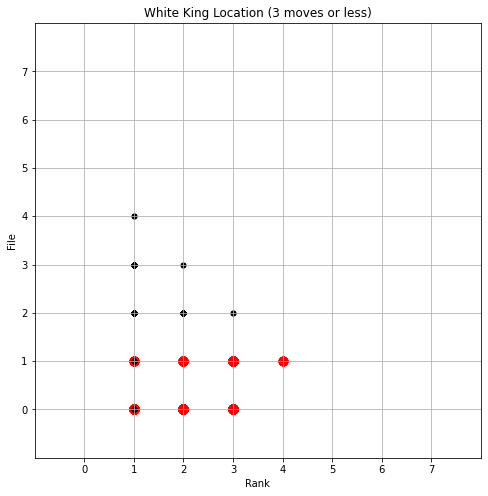

In [165]:
## Create a list of ticks to populate the edges of the graph.
ticks = [0,1,2,3,4,5,6,7,]

## Plot a graph that represents a chess board so that we may see where the king locations are
## for 3 moves to win or less.
plt.figure(figsize=(8,8))
plt.scatter(less2win['White King rank'],less2win['White King file'], c = 'red', s=80)
plt.scatter(less2win['Black King rank'],less2win['Black King file'], c = 'black', s=20)
plt.xlim(-1,8)
plt.ylim(-1,8)
plt.xticks([0,1,2,3,4,5,6,7,],ticks)
plt.yticks([0,1,2,3,4,5,6,7,],ticks)
plt.title("White King Location (3 moves or less)")
plt.xlabel('Rank')
plt.ylabel('File')
plt.grid()
plt.plot()

In this graph, we can see where the both the black king and white king were recorded to be located with 3 moves or less(white wins). 


<u>Rank & File Definition:</u>
   * Rank = Columns
   * File = Rows

## Data Preparation

## Modeling

## Final Thoughts